Preprocessing

In [1]:
#Import required packages

import pandas as pd
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from librosa import display
from datetime import datetime

In [2]:
#Load fma data set

sound_features = pd.read_csv('C:/Data/fma_metadata/features.csv',sep=',', header=[0, 1, 2], index_col = 0)
sound_features.index = sound_features.index.map(np.int)

In [3]:
#Load popularities from Spotif

popularities = pd.read_csv("C:/Data/tracksinspotify.csv")
popularities = popularities.set_index("track_id")
popularities = popularities.drop(columns=["spotify_id", "Unnamed: 0"])

In [4]:
#Join Lables to sound features and drop songs without spotify match

sound_features_columns = sound_features.columns
sound_features = sound_features.join(popularities)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [5]:
#Delete rows with null values e.g. no matches from Spotify

sound_features = sound_features.dropna()

In [6]:
#Delete duplicate rows

sound_features = sound_features.drop_duplicates()

In [7]:
#Clean data sets

popularities = sound_features["popularity"]
sound_features = sound_features.drop(columns=["popularity"])
sound_features.columns = sound_features_columns

In [331]:
#Have a look
new_sound_features = pd.DataFrame(index=sound_features.index)
#sound_features.head()
for l1 in sound_features.columns.get_level_values(0).unique().to_list():
    for l2 in sound_features[l1].columns.get_level_values(0).unique().to_list():
        new_sound_features = new_sound_features.join(pd.DataFrame(sound_features[(l1, l2)].mean(axis=1), index=sound_features.index
                         , columns=pd.MultiIndex.from_product([[l1], [l2], ["mean"]], names=['feature', 'statistics', 'substatistic'])))
#        new_sound_features = new_sound_features.join(pd.DataFrame(sound_features[(l1, l2)].std(axis=1), index=sound_features.index
#                         , columns=pd.MultiIndex.from_product([[l1], [l2], ["std"]], names=['feature', 'statistics', 'substatistic'])))
#        new_sound_features = new_sound_features.join(pd.DataFrame(sound_features[(l1, l2)].max(axis=1), index=sound_features.index
#                         , columns=pd.MultiIndex.from_product([[l1], [l2], ["max"]], names=['feature', 'statistics', 'substatistic'])))
#        new_sound_features = new_sound_features.join(pd.DataFrame(sound_features[(l1, l2)].min(axis=1), index=sound_features.index
#                         , columns=pd.MultiIndex.from_product([[l1], [l2], ["min"]], names=['feature', 'statistics', 'substatistic'])))
#pd.DataFrame(index=sound_features.index, pd.MultiIndex.from_tuples)

new_sound_features.columns = pd.MultiIndex.from_tuples(new_sound_features)

new_sound_features



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


chroma_cens                                                    \
            kurtosis       max      mean    median       min      skew   
                mean      mean      mean      mean      mean      mean   
track_id                                                                 
10          1.603768  0.553093  0.270363  0.270178  0.001891 -0.079567   
141        -0.621903  0.671449  0.231851  0.221719  0.000000  0.323393   
149        -0.473577  0.637216  0.241660  0.235610  0.000000  0.139467   
150        -0.102670  0.637176  0.258063  0.257411  0.000000  0.060905   
153         1.173833  0.594077  0.275113  0.266690  0.000000  0.183439   
...              ...       ...       ...       ...       ...       ...   
155296     -1.084513  0.586528  0.226768  0.224842  0.000000  0.096516   
155314     -0.469733  0.619113  0.256617  0.244209  0.004010  0.305105   
155316      1.154337  0.591883  0.236086  0.233874  0.002541  0.388565   
155319     -0.108867  0.615697  0.263989  0.243265  0.007469  0.459516   
155320     -0.014882  0.620793  0.259474  0.246760  0.002188  0.393354   

                   chroma_cqt                 ...   tonnetz            \
               std   kurtosis  max      mean  ...       min      skew   
              mean       mean mean      mean  ...      mean      mean   
track_id                                      ...                       
10        0.081247  -0.317063  1.0  0.607028  ... -0.166928 -0.013220   
141       0.161059  -0.639983  1.0  0.435279  ... -0.224393 -0.015261   
149       0.129873  -0.523839  1.0  0.511891  ... -0.213262 -0.025498   
150       0.111896  -0.699204  1.0  0.570434  ... -0.232530 -0.248753   
153       0.081276  -0.526051  1.0  0.643209  ... -0.170705  0.049496   
...            ...        ...  ...       ...  ...       ...       ...   
155296    0.167185  -0.678044  1.0  0.425370  ... -0.184810 -0.141988   
155314    0.125164  -0.713731  1.0  0.501814  ... -0.158522  0.006543   
155316    0.117306   0.672790  1.0  0.426605  ... -0.197995 -0.437016   
155319    0.111359  -0.898425  1.0  0.551253  ... -0.151796  0.000791   
155320    0.119474  -0.783610  1.0  0.522278  ... -0.149781 -0.013931   

                           zcr                                          \
               std    kurtosis       max      mean    median       min   
              mean        mean      mean      mean      mean      mean   
track_id                                                                 
10        0.041305   21.434212  0.452148  0.077515  0.071777  0.000000   
141       0.073097   32.994659  0.415527  0.040267  0.034668  0.002930   
149       0.055247   19.319490  0.559082  0.045064  0.028320  0.000000   
150       0.050614   10.283248  0.520996  0.038384  0.019531  0.001465   
153       0.036488  179.469254  0.852051  0.061346  0.059082  0.000000   
...            ...         ...       ...       ...       ...       ...   
155296    0.076176   73.042824  0.845703  0.062913  0.051758  0.007812   
155314    0.048980    8.916731  0.227051  0.042894  0.039551  0.006348   
155316    0.054275    4.448255  0.172852  0.028773  0.028320  0.003906   
155319    0.043839    6.188604  0.167480  0.041480  0.038086  0.004883   
155320    0.046086   21.756050  0.845215  0.075141  0.044434  0.004395   

                               
               skew       std  
               mean      mean  
track_id                       
10         3.542325  0.040800  
141        4.204097  0.028665  
149        4.167562  0.060894  
150        3.125291  0.056584  
153       12.755673  0.052093  
...             ...       ...  
155296     7.898036  0.068594  
155314     1.989080  0.019288  
155316     0.955388  0.012385  
155319     1.818740  0.020133  
155320     4.687204  0.137205  

[22608 rows x 77 columns]

In [60]:
popularities.head()

track_id
10     32.0
141     1.0
149     0.0
150     0.0
153     0.0
Name: popularity, dtype: float64

In [61]:
#some advanced indexing
#print(sound_features.columns)
#idx = pd.IndexSlice
#sound_features.loc[:,idx[:,("mean","std")]]

In [62]:
#Label Binarization with 75% Quartile of label histogram wihtout considering zeros

popularities_binary = popularities > 11
popularities[popularities > 0].describe()

count    8777.000000
mean        8.399909
std         9.518324
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        70.000000
Name: popularity, dtype: float64

In [332]:
#feature standardization

sound_features_scaled = pd.DataFrame(preprocessing.scale(new_sound_features)).fillna(0)
sound_features_scaled.index = new_sound_features.index
sound_features_scaled.columns = new_sound_features.columns

sound_features_scaled.head()

chroma_cens                                                    \
            kurtosis       max      mean    median       min      skew   
                mean      mean      mean      mean      mean      mean   
track_id                                                                 
10          0.225690 -1.117222  1.341959  1.291604 -0.264976 -1.343138   
141        -0.130167  1.345480 -0.696836 -0.493255 -0.410684  0.171417   
149        -0.106451  0.633170 -0.177525  0.018377 -0.410684 -0.519882   
150        -0.047148  0.632344  0.690808  0.821360 -0.410684 -0.815165   
153         0.156949 -0.264450  1.593383  1.163137 -0.410684 -0.354610   

                   chroma_cqt                      ...   tonnetz            \
               std   kurtosis       max      mean  ...       min      skew   
              mean       mean      mean      mean  ...      mean      mean   
track_id                                           ...                       
10       -1.605207   0.007243  0.060781  1.701450  ...  0.094015  0.038962   
141       1.189980  -0.163716  0.060781 -0.687658  ... -1.410299  0.028811   
149       0.097784  -0.102227  0.060781  0.378052  ... -1.118906 -0.022100   
150      -0.531815  -0.195068  0.060781  1.192420  ... -1.623311 -1.132337   
153      -1.604215  -0.103398  0.060781  2.204753  ... -0.004860  0.350846   

                         zcr                                          \
               std  kurtosis       max      mean    median       min   
              mean      mean      mean      mean      mean      mean   
track_id                                                               
10       -0.800298 -0.148531  0.332249  1.121906  1.301452 -0.637579   
141       1.325969  0.014993  0.139812 -0.363023 -0.274394  0.105054   
149       0.132145 -0.178444  0.894167 -0.171801 -0.543946 -0.637579   
150      -0.177737 -0.306264  0.694032 -0.438080 -0.917173 -0.266262   
153      -1.122480  2.086903  2.433665  0.477320  0.762347 -0.637579   

                              
              skew       std  
              mean      mean  
track_id                      
10        0.006404  0.101855  
141       0.223771 -0.393111  
149       0.211771  0.921404  
150      -0.130576  0.745634  
153       3.032647  0.562425  

[5 rows x 77 columns]

In [333]:
#Validation set split
from sklearn.model_selection import train_test_split

data_train, data_validation, target_train, target_validation = train_test_split(sound_features_scaled, popularities_binary, test_size=0.2, random_state=420)


Optimal number of features : 45


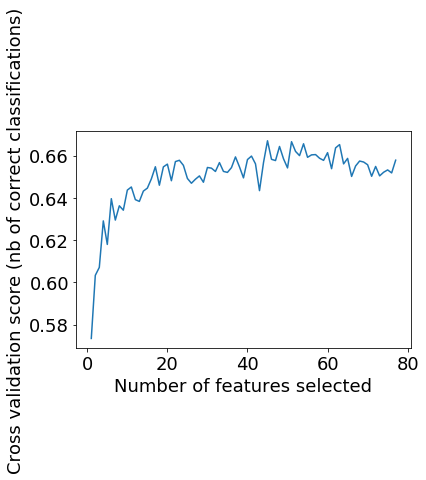

In [334]:
'''
Dimensionality reduction

ACHTUNG PERFOMANCE!!
'''
import matplotlib.pyplot as plt
#from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)
data_train_balanced, target_train_balanced = rus.fit_resample(data_train,target_train)
    

classifier = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
#evtl step auf 3 setzen um performance zu verbessern
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(4),
              scoring='f1')
rfecv.fit(data_train_balanced, target_train_balanced)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [313]:
print("finished at " + str(datetime.now(tz=None))) #startet 1:38

finished at 2019-11-25 02:31:31.179126


In [335]:
data_train = pd.DataFrame(rfecv.transform(data_train), columns =data_train.columns[rfecv.support_], index = data_train.index)
data_validation = pd.DataFrame(rfecv.transform(data_validation), columns =data_validation.columns[rfecv.support_], index = data_validation.index)

In [336]:
#Stratified 5-fold sampling and balancing

from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

train_indices = []
train_indices_balanced = []
test_indices = []
skf = StratifiedKFold(n_splits = 4, random_state = 420, shuffle = True)
rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)

for train_index, test_index in skf.split(data_train, target_train):
    #convert index to track_id
    train_index = data_train.index[train_index]
    test_index = data_train.index[test_index]
    
    #Balancing training set
    data_train_balanced, target_train_balanced = rus.fit_resample(data_train.loc[train_index], target_train.loc[train_index])
    
    #Creating lists for cv
    train_indices.append(train_index)
    test_indices.append(test_index)
    train_indices_balanced.append(train_index[rus.sample_indices_])

print("Total data set size\t"+str(len(sound_features_scaled))+' (relative amount popular songs: '+str(round(popularities_binary.value_counts()[1]/len(popularities_binary)*100,2))+'%)')
print("Training set size\t"+str(len(data_train))+' ('+str(round(target_train.value_counts()[1]/len(target_train)*100,2))+'%)')
print("Validation set size\t"+str(len(data_validation))+' ('+str(round(target_validation.value_counts()[1]/len(target_validation)*100,2))+'%)\r\n')

print("Cross-Validation splits:\r\ncv\ttrain\t\t\tbalanced\t\ttest")
for cv in range(0,4):
    print(str(cv)+'\t'+str(len(train_indices[cv])) +' ('+str(round(target_train.loc[train_indices[cv]].value_counts()[1]/len(train_indices[cv])*100,2))+'%)'
                  '\t\t'+str(len(train_indices_balanced[cv]))+' ('+str(round(target_train.loc[train_indices_balanced[cv]].value_counts()[1]/len(train_indices_balanced[cv])*100))+'%)'
                  '\t\t'+str(len(test_indices[cv]))+' ('+str(round(target_train.loc[test_indices[cv]].value_counts()[1]/len(test_indices[cv])*100,2))+'%)'
)

Total data set size	22608 (relative amount popular songs: 9.65%)
Training set size	18086 (9.76%)
Validation set size	4522 (9.22%)

Cross-Validation splits:
cv	train			balanced		test
0	13563 (9.75%)		2646 (50.0%)		4523 (9.77%)
1	13565 (9.76%)		2648 (50.0%)		4521 (9.75%)
2	13565 (9.76%)		2648 (50.0%)		4521 (9.75%)
3	13565 (9.76%)		2648 (50.0%)		4521 (9.75%)


In [337]:
'''
DIMENSIONALITY REDUCTION
'''
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 7, random_state=42)
#pca.fit(data_train)
#data_train = pd.DataFrame(pca.transform(X=data_train))
#data_test = pd.DataFrame(pca.transform(X=data_test))

'\nDIMENSIONALITY REDUCTION\n'

In [338]:
'''
DROP COLUMNS
'''
#data_train = data_train.loc[:,"chroma_stft":"chroma_stft.83"]
#data_test = data_test.loc[:,"chroma_stft":"chroma_stft.83"]
#data_train.head()


'\nDROP COLUMNS\n'

In [339]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

def performance(target_test, predictions):
    
    conf_matrix = confusion_matrix(target_test,predictions)
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate the recall
    conf_recall = (TP / float(TP + FN))    

    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TP / float(TN + FP))    

    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_recall) / (conf_precision + conf_recall)) 

    return conf_accuracy, conf_recall, conf_specificity, conf_precision, conf_f1

In [340]:
#Create perfomance Dataframes
cv_perf = pd.DataFrame(columns = ['accuracy', 'recall', 'specificity', 'precision', 'f1 score']
                  , index = pd.MultiIndex.from_arrays([[],[],[],[]], names =['classifier_name', 'coeff_value','balanced', 'cv']))
roc_perf = pd.DataFrame(columns = ['tpr', 'auc']
                  , index = pd.MultiIndex.from_arrays([[],[],[],[]], names =['classifier_name', 'coeff_value','balanced', 'cv']))
roc_mean_perf = pd.DataFrame(columns = ['tpr', 'auc', "auc_std"]
                  , index = pd.MultiIndex.from_arrays([[],[],[]], names =['classifier_name', 'coeff_value','balanced']))



#Assign fpr value for tpr interpolation in ROC calculation
mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]

#Slicing pandas multiindex for perfomance Dataframes
idx = pd.IndexSlice

#Define function that runs crossvalidation for balanced and inbalanced data
def run_classifier(classifier, classifier_name, coeff_value):
    
    #cross-validation
    for cv in range(0,4):
        
        #Testing balanced and unbalanced
        for balanced in (True, False):
            print("starting to run cv " + str(cv) + ", balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))
            
            if(balanced):
                classifier.fit(data_train.loc[train_indices_balanced[cv]], target_train.loc[train_indices_balanced[cv]])
            else:
                classifier.fit(data_train.loc[train_indices[cv]], target_train.loc[train_indices[cv]])
            
            #performance
            predictions = classifier.predict(data_train.loc[test_indices[cv]])
            acc, sens, spec, prec, f1 = performance(target_train.loc[test_indices[cv]], predictions)
            cv_perf.loc[classifier_name, coeff_value if coeff_value else 'None',balanced, cv] = {'accuracy': acc, 'recall': sens,'specificity': spec, 'precision': prec, 'f1 score': f1}
            
            #ROC
            predictions_probas = classifier.predict_proba(data_train.loc[test_indices[cv]])
            fpr, tpr, thresholds = roc_curve(target_train.loc[test_indices[cv]], predictions_probas[:,1])
            tprs = np.interp(mean_fpr, fpr, tpr)
            tprs[0] = 0.0 
            roc_perf.loc[classifier_name, coeff_value if coeff_value else 'None',balanced, cv] = {'tpr':tprs , 'auc': auc(fpr, tpr)}
            
            print("finished to run cv " + str(cv) + ", balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

In [341]:
#function to plot crossvalidated ROC
def plot_roc(classifier_name, coeff_range):
    for balanced in (True,False):
        if(balanced):
            plt.title('ROC(cv mean) - balanced data - '+classifier_name)
        else:
            plt.title('ROC(cv mean) - unbalanced data - '+classifier_name)
        for c in coeff_range:
            mean_tpr = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"tpr"].values.mean()
            mean_tpr[-1] = 1.0 # set the last tpr to 1
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"auc"].values.std()
            
            roc_mean_perf.loc[classifier_name, c if c else 'None',balanced] = {'tpr':mean_tpr , 'auc': mean_auc, 'auc_std': std_auc}
            plt.plot(mean_fpr, mean_tpr, label = '(coeff = '+str(c)+') AUC = '+str(round(mean_auc,4))+' (+/- '+str(round(std_auc,4))+')')
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [342]:
from sklearn.neighbors import KNeighborsClassifier

#variables for KNN
classifier_name = 'KNeighborsClassifier'
try:
    roc_perf.drop([classifier_name], inplace=True)
except:
    pass
coeff_range = range(3,8,2)
#Testing different n_neighbors
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = KNeighborsClassifier(n_neighbors=c, n_jobs = 2)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=3 at 2019-11-25 09:22:37.460861
starting to run cv 0, balanced=True at 2019-11-25 09:22:37.460861
finished to run cv 0, balanced=True at 2019-11-25 09:22:38.600395
starting to run cv 0, balanced=False at 2019-11-25 09:22:38.600395
finished to run cv 0, balanced=False at 2019-11-25 09:22:43.451467
starting to run cv 1, balanced=True at 2019-11-25 09:22:43.452465
finished to run cv 1, balanced=True at 2019-11-25 09:22:44.563596
starting to run cv 1, balanced=False at 2019-11-25 09:22:44.563596
finished to run cv 1, balanced=False at 2019-11-25 09:22:49.110277
starting to run cv 2, balanced=True at 2019-11-25 09:22:49.110277
finished to run cv 2, balanced=True at 2019-11-25 09:22:50.216414
starting to run cv 2, balanced=False at 2019-11-25 09:22:50.216414
finished to run cv 2, balanced=False at 2019-11-25 09:22:55.392012
starting to run cv 3, balanced=True at 2019-11-25 09:22:55.392012
finished to run cv 3, balanced=True at 2019-11-25 09:22:56.294609
starting to run cv 3

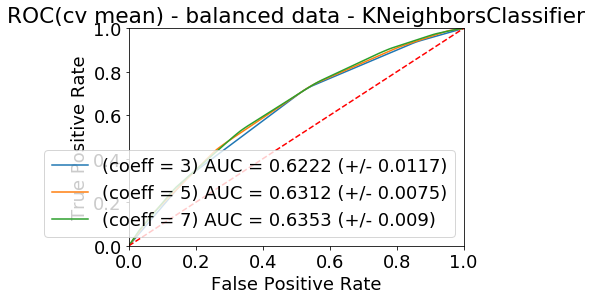

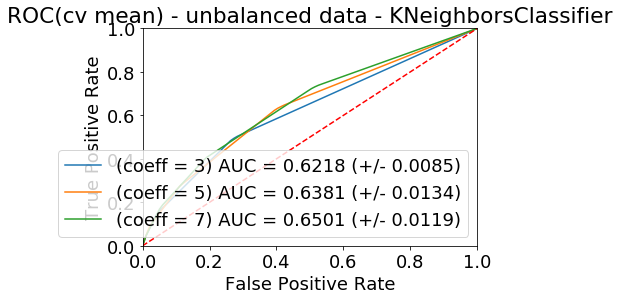

KNeighborsClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
3           False     0.878635     0.957785  0.028641  0.621807  0.008493
            True      0.496463     0.472031  0.140992  0.622219  0.011695
5           False     0.892624     0.979658  0.017140  0.638086  0.013414
            True      0.483138     0.455610  0.143978  0.631211  0.007550
7           False     0.897379     0.989278  0.009289  0.650085  0.011882
            True      0.470697     0.440538  0.146300  0.635276  0.009036

In [343]:
#Evaluate perfomance

plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [344]:
from sklearn.tree import DecisionTreeClassifier
classifier_name = 'DecisionTreeClassifier'
coeff_range = (None, 10 , 5)

#Testing max tree sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = DecisionTreeClassifier(max_depth = c, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=None at 2019-11-25 09:23:59.948921
starting to run cv 0, balanced=True at 2019-11-25 09:23:59.949920
finished to run cv 0, balanced=True at 2019-11-25 09:24:00.091050
starting to run cv 0, balanced=False at 2019-11-25 09:24:00.092048
finished to run cv 0, balanced=False at 2019-11-25 09:24:00.977188
starting to run cv 1, balanced=True at 2019-11-25 09:24:00.977188
finished to run cv 1, balanced=True at 2019-11-25 09:24:01.098863
starting to run cv 1, balanced=False at 2019-11-25 09:24:01.098863
finished to run cv 1, balanced=False at 2019-11-25 09:24:01.943615
starting to run cv 2, balanced=True at 2019-11-25 09:24:01.943615
finished to run cv 2, balanced=True at 2019-11-25 09:24:02.062298
starting to run cv 2, balanced=False at 2019-11-25 09:24:02.062298
finished to run cv 2, balanced=False at 2019-11-25 09:24:02.856174
starting to run cv 3, balanced=True at 2019-11-25 09:24:02.857170
finished to run cv 3, balanced=True at 2019-11-25 09:24:02.996797
starting to run c

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:24:07.206627
starting to run cv 2, balanced=True at 2019-11-25 09:24:07.207625
finished to run cv 2, balanced=True at 2019-11-25 09:24:07.268461
starting to run cv 2, balanced=False at 2019-11-25 09:24:07.268461
finished to run cv 2, balanced=False at 2019-11-25 09:24:07.541237
starting to run cv 3, balanced=True at 2019-11-25 09:24:07.542234
finished to run cv 3, balanced=True at 2019-11-25 09:24:07.605066
starting to run cv 3, balanced=False at 2019-11-25 09:24:07.605066
finished to run cv 3, balanced=False at 2019-11-25 09:24:07.872351
finished to run c=5 at 2019-11-25 09:24:07.872351


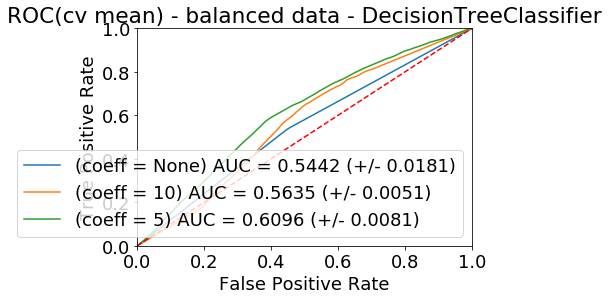

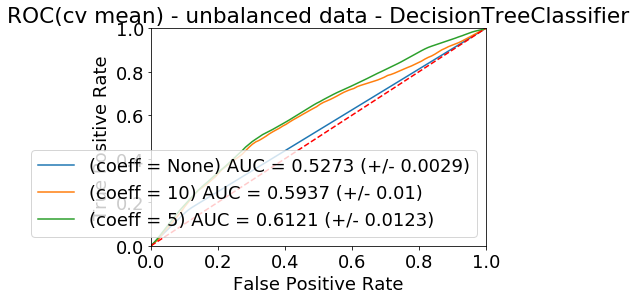

DecisionTreeClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
5           False     0.899757     0.996446  0.001475  0.612105  0.012302
            True      0.541308     0.529261  0.127391  0.609598  0.008062
10          False     0.884883     0.977330  0.005861  0.593681  0.009952
            True      0.534556     0.526560  0.118767  0.563496  0.005127
None        False     0.817538     0.887936  0.032512  0.527253  0.002861
            True      0.550813     0.552417  0.104611  0.544188  0.018132

In [345]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [346]:
classifier_name = 'DecisionTreeClassifier'
c = None
balanced = True
cv_perf.loc[classifier_name]
mean_tpr = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"tpr"].values.mean()
mean_tpr[-1] = 1.0 # set the last tpr to 1
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"auc"].values.std()
#roc_mean_perf.loc[classifier_name, c if c else 'None',balanced] = 
print({'tpr':mean_tpr , 'auc': mean_auc, 'auc_std': std_auc})
#plt.plot(mean_fpr, mean_tpr, label = '(coeff = '+str(c)+') AUC = '+str(round(mean_auc,4))+' (+/- '+str(round(std_auc,4))+')')

print(mean_tpr)
print(mean_auc)
print(std_auc)

{'tpr': array([0.        , 0.01208654, 0.02417308, 0.03625963, 0.04834617,
       0.06043271, 0.07251925, 0.08460579, 0.09669233, 0.10877888,
       0.12086542, 0.13295196, 0.1450385 , 0.15712504, 0.16921158,
       0.18129813, 0.19338467, 0.20547121, 0.21755775, 0.22964429,
       0.24173083, 0.25381738, 0.26590392, 0.27799046, 0.290077  ,
       0.30216354, 0.31425009, 0.32633663, 0.33842317, 0.35050971,
       0.36259625, 0.37468279, 0.38676934, 0.39885588, 0.41094242,
       0.42302896, 0.4351155 , 0.44720204, 0.45928859, 0.47137513,
       0.48346167, 0.49554821, 0.50763475, 0.51972129, 0.53165974,
       0.54214729, 0.55062604, 0.5591048 , 0.56758355, 0.5760623 ,
       0.58454106, 0.59301981, 0.60149857, 0.60997732, 0.61845607,
       0.62693483, 0.63541358, 0.64389234, 0.65237109, 0.66084984,
       0.6693286 , 0.67780735, 0.68628611, 0.69476486, 0.70324361,
       0.71172237, 0.72020112, 0.72867987, 0.73715863, 0.74563738,
       0.75411614, 0.76259489, 0.77107364, 0.7795524 ,

In [347]:
from sklearn.ensemble import RandomForestClassifier

classifier_name = 'RandomForestClassifier'
coeff_range = (10, 50, 100)

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = RandomForestClassifier(n_estimators = c, max_depth = 5, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=10 at 2019-11-25 09:24:08.201482
starting to run cv 0, balanced=True at 2019-11-25 09:24:08.201482
finished to run cv 0, balanced=True at 2019-11-25 09:24:08.270803
starting to run cv 0, balanced=False at 2019-11-25 09:24:08.270803


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:24:08.514656
starting to run cv 1, balanced=True at 2019-11-25 09:24:08.514656
finished to run cv 1, balanced=True at 2019-11-25 09:24:08.582474
starting to run cv 1, balanced=False at 2019-11-25 09:24:08.583472


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:24:08.844773
starting to run cv 2, balanced=True at 2019-11-25 09:24:08.844773
finished to run cv 2, balanced=True at 2019-11-25 09:24:08.925557
starting to run cv 2, balanced=False at 2019-11-25 09:24:08.926554


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:24:09.170900
starting to run cv 3, balanced=True at 2019-11-25 09:24:09.170900
finished to run cv 3, balanced=True at 2019-11-25 09:24:09.235233
starting to run cv 3, balanced=False at 2019-11-25 09:24:09.236231


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 09:24:09.505511
finished to run c=10 at 2019-11-25 09:24:09.506508
starting to run c=50 at 2019-11-25 09:24:09.506508
starting to run cv 0, balanced=True at 2019-11-25 09:24:09.506508
finished to run cv 0, balanced=True at 2019-11-25 09:24:09.757345
starting to run cv 0, balanced=False at 2019-11-25 09:24:09.757345


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:24:10.927736
starting to run cv 1, balanced=True at 2019-11-25 09:24:10.927736
finished to run cv 1, balanced=True at 2019-11-25 09:24:11.172083
starting to run cv 1, balanced=False at 2019-11-25 09:24:11.173080


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:24:12.325742
starting to run cv 2, balanced=True at 2019-11-25 09:24:12.325742
finished to run cv 2, balanced=True at 2019-11-25 09:24:12.574582
starting to run cv 2, balanced=False at 2019-11-25 09:24:12.574582


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:24:13.756420
starting to run cv 3, balanced=True at 2019-11-25 09:24:13.757417
finished to run cv 3, balanced=True at 2019-11-25 09:24:14.048146
starting to run cv 3, balanced=False at 2019-11-25 09:24:14.048146


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 09:24:15.210059
finished to run c=50 at 2019-11-25 09:24:15.210059
starting to run c=100 at 2019-11-25 09:24:15.210059
starting to run cv 0, balanced=True at 2019-11-25 09:24:15.210059
finished to run cv 0, balanced=True at 2019-11-25 09:24:15.693765
starting to run cv 0, balanced=False at 2019-11-25 09:24:15.693765


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:24:17.999651
starting to run cv 1, balanced=True at 2019-11-25 09:24:17.999651
finished to run cv 1, balanced=True at 2019-11-25 09:24:18.486864
starting to run cv 1, balanced=False at 2019-11-25 09:24:18.487861


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:24:20.747334
starting to run cv 2, balanced=True at 2019-11-25 09:24:20.748331
finished to run cv 2, balanced=True at 2019-11-25 09:24:21.208112
starting to run cv 2, balanced=False at 2019-11-25 09:24:21.209110


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:24:23.514711
starting to run cv 3, balanced=True at 2019-11-25 09:24:23.515708
finished to run cv 3, balanced=True at 2019-11-25 09:24:23.994439
starting to run cv 3, balanced=False at 2019-11-25 09:24:23.995436
finished to run cv 3, balanced=False at 2019-11-25 09:24:26.230984
finished to run c=100 at 2019-11-25 09:24:26.231981


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


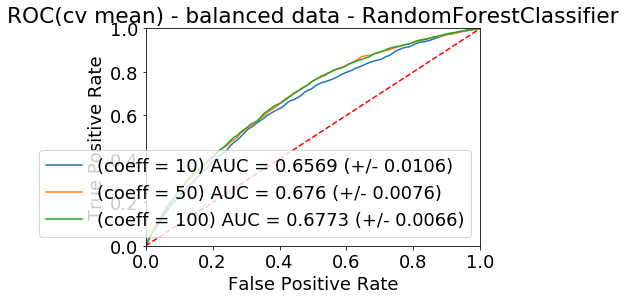

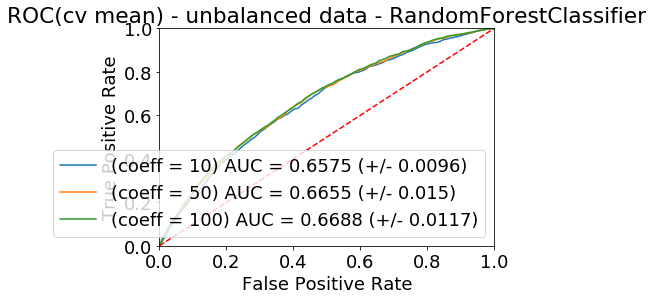

RandomForestClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
10          False     0.902355     0.999939       NaN  0.657524  0.009578
            True      0.559161     0.545861  0.133142  0.656925  0.010595
50          False     0.902411     1.000000       NaN  0.665470  0.014998
            True      0.584043     0.573311  0.133363  0.676026  0.007632
100         False     0.902411     1.000000       NaN  0.668789  0.011750
            True      0.580007     0.568654  0.133695  0.677314  0.006567

In [348]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [349]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_name = 'GradientBoostingClassifier'
coeff_range = (10, 50, 100)

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = GradientBoostingClassifier(n_estimators = c, max_depth = 5, learning_rate = 0.1, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=10 at 2019-11-25 09:24:26.588533
starting to run cv 0, balanced=True at 2019-11-25 09:24:26.588533
finished to run cv 0, balanced=True at 2019-11-25 09:24:26.807947
starting to run cv 0, balanced=False at 2019-11-25 09:24:26.808944


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:24:27.867127
starting to run cv 1, balanced=True at 2019-11-25 09:24:27.867127
finished to run cv 1, balanced=True at 2019-11-25 09:24:28.097511
starting to run cv 1, balanced=False at 2019-11-25 09:24:28.097511


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:24:29.047475
starting to run cv 2, balanced=True at 2019-11-25 09:24:29.048472
finished to run cv 2, balanced=True at 2019-11-25 09:24:29.247447
starting to run cv 2, balanced=False at 2019-11-25 09:24:29.248445


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:24:30.207400
starting to run cv 3, balanced=True at 2019-11-25 09:24:30.207400
finished to run cv 3, balanced=True at 2019-11-25 09:24:30.392904
starting to run cv 3, balanced=False at 2019-11-25 09:24:30.392904


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 09:24:31.343360
finished to run c=10 at 2019-11-25 09:24:31.344358
starting to run c=50 at 2019-11-25 09:24:31.344358
starting to run cv 0, balanced=True at 2019-11-25 09:24:31.344358
finished to run cv 0, balanced=True at 2019-11-25 09:24:32.052967
starting to run cv 0, balanced=False at 2019-11-25 09:24:32.053965
finished to run cv 0, balanced=False at 2019-11-25 09:24:35.652724
starting to run cv 1, balanced=True at 2019-11-25 09:24:35.652724
finished to run cv 1, balanced=True at 2019-11-25 09:24:36.329226
starting to run cv 1, balanced=False at 2019-11-25 09:24:36.329226
finished to run cv 1, balanced=False at 2019-11-25 09:24:39.854902
starting to run cv 2, balanced=True at 2019-11-25 09:24:39.855899
finished to run cv 2, balanced=True at 2019-11-25 09:24:40.583005
starting to run cv 2, balanced=False at 2019-11-25 09:24:40.584003


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:24:44.454696
starting to run cv 3, balanced=True at 2019-11-25 09:24:44.454696
finished to run cv 3, balanced=True at 2019-11-25 09:24:45.201206
starting to run cv 3, balanced=False at 2019-11-25 09:24:45.201206
finished to run cv 3, balanced=False at 2019-11-25 09:24:49.050964
finished to run c=50 at 2019-11-25 09:24:49.051961
starting to run c=100 at 2019-11-25 09:24:49.051961
starting to run cv 0, balanced=True at 2019-11-25 09:24:49.051961
finished to run cv 0, balanced=True at 2019-11-25 09:24:50.452226
starting to run cv 0, balanced=False at 2019-11-25 09:24:50.453224
finished to run cv 0, balanced=False at 2019-11-25 09:24:57.429753
starting to run cv 1, balanced=True at 2019-11-25 09:24:57.429753
finished to run cv 1, balanced=True at 2019-11-25 09:24:58.735957
starting to run cv 1, balanced=False at 2019-11-25 09:24:58.736953
finished to run cv 1, balanced=False at 2019-11-25 09:25:05.701812
starting to run cv 2, balanced=T

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:25:13.922167
starting to run cv 3, balanced=True at 2019-11-25 09:25:13.923164
finished to run cv 3, balanced=True at 2019-11-25 09:25:15.242730
starting to run cv 3, balanced=False at 2019-11-25 09:25:15.242730
finished to run cv 3, balanced=False at 2019-11-25 09:25:22.240422
finished to run c=100 at 2019-11-25 09:25:22.241420


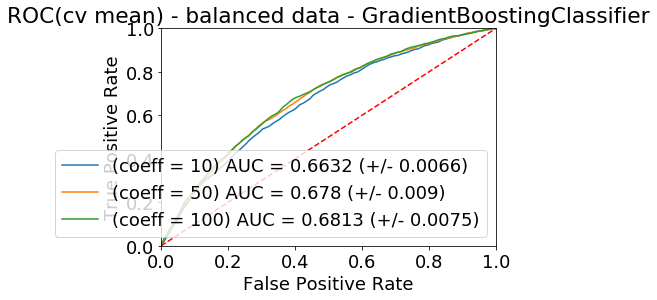

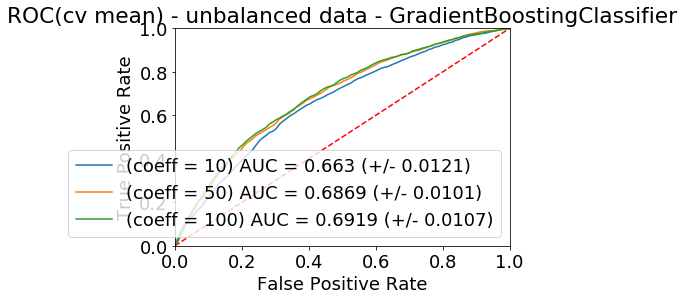

GradientBoostingClassifier - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
10          False     0.902355     0.999939       NaN  0.662996  0.012068
            True      0.581278     0.572085  0.130046  0.663233  0.006558
50          False     0.901747     0.999020  0.000590  0.686911  0.010117
            True      0.610139     0.605232  0.127944  0.677975  0.009014
100         False     0.901415     0.998530  0.000885  0.691948  0.010737
            True      0.623022     0.618957  0.128940  0.681340  0.007483

In [350]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [351]:
from sklearn.svm import SVC

classifier_name = 'SVC'
coeff_range = ('linear','rbf','poly')

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = SVC(kernel = c, C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=linear at 2019-11-25 09:25:22.550133
starting to run cv 0, balanced=True at 2019-11-25 09:25:22.550133
finished to run cv 0, balanced=True at 2019-11-25 09:25:26.094927
starting to run cv 0, balanced=False at 2019-11-25 09:25:26.095925


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:26:00.746379
starting to run cv 1, balanced=True at 2019-11-25 09:26:00.746379
finished to run cv 1, balanced=True at 2019-11-25 09:26:04.144523
starting to run cv 1, balanced=False at 2019-11-25 09:26:04.145036


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:26:32.671811
starting to run cv 2, balanced=True at 2019-11-25 09:26:32.671811
finished to run cv 2, balanced=True at 2019-11-25 09:26:36.135604
starting to run cv 2, balanced=False at 2019-11-25 09:26:36.136602


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:27:13.629921
starting to run cv 3, balanced=True at 2019-11-25 09:27:13.629921
finished to run cv 3, balanced=True at 2019-11-25 09:27:17.263261
starting to run cv 3, balanced=False at 2019-11-25 09:27:17.263261


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 09:27:56.539420
finished to run c=linear at 2019-11-25 09:27:56.540418
starting to run c=rbf at 2019-11-25 09:27:56.540418
starting to run cv 0, balanced=True at 2019-11-25 09:27:56.540418
finished to run cv 0, balanced=True at 2019-11-25 09:27:59.085701
starting to run cv 0, balanced=False at 2019-11-25 09:27:59.086698


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:28:35.040709
starting to run cv 1, balanced=True at 2019-11-25 09:28:35.040709
finished to run cv 1, balanced=True at 2019-11-25 09:28:37.660581
starting to run cv 1, balanced=False at 2019-11-25 09:28:37.660581


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:29:13.244525
starting to run cv 2, balanced=True at 2019-11-25 09:29:13.245522
finished to run cv 2, balanced=True at 2019-11-25 09:29:15.816871
starting to run cv 2, balanced=False at 2019-11-25 09:29:15.817869


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 2, balanced=False at 2019-11-25 09:29:50.554175
starting to run cv 3, balanced=True at 2019-11-25 09:29:50.554689
finished to run cv 3, balanced=True at 2019-11-25 09:29:53.072505
starting to run cv 3, balanced=False at 2019-11-25 09:29:53.072505


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 09:30:35.998114
finished to run c=rbf at 2019-11-25 09:30:35.998114
starting to run c=poly at 2019-11-25 09:30:35.998114
starting to run cv 0, balanced=True at 2019-11-25 09:30:35.999111
finished to run cv 0, balanced=True at 2019-11-25 09:30:38.388271
starting to run cv 0, balanced=False at 2019-11-25 09:30:38.389267


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 0, balanced=False at 2019-11-25 09:31:13.337003
starting to run cv 1, balanced=True at 2019-11-25 09:31:13.337003
finished to run cv 1, balanced=True at 2019-11-25 09:31:15.542147
starting to run cv 1, balanced=False at 2019-11-25 09:31:15.543143


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 1, balanced=False at 2019-11-25 09:31:49.265232
starting to run cv 2, balanced=True at 2019-11-25 09:31:49.265232
finished to run cv 2, balanced=True at 2019-11-25 09:31:51.502791
starting to run cv 2, balanced=False at 2019-11-25 09:31:51.502791
finished to run cv 2, balanced=False at 2019-11-25 09:32:26.937912
starting to run cv 3, balanced=True at 2019-11-25 09:32:26.937912
finished to run cv 3, balanced=True at 2019-11-25 09:32:29.309599
starting to run cv 3, balanced=False at 2019-11-25 09:32:29.310597


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run cv 3, balanced=False at 2019-11-25 09:33:04.177550
finished to run c=poly at 2019-11-25 09:33:04.178546


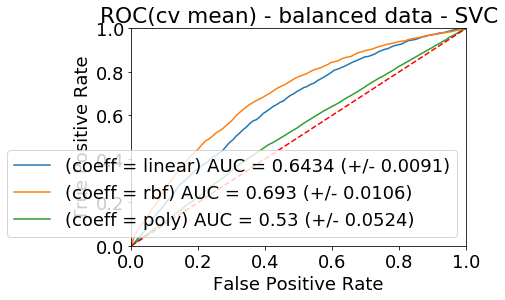

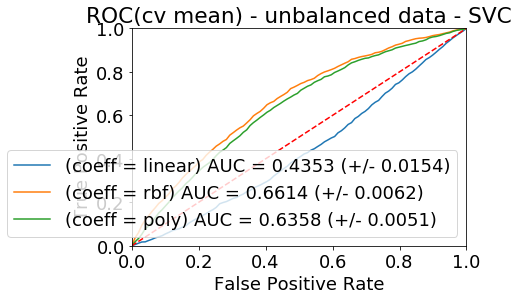

SVC - Perfomance


accuracy  specificity  f1 score       auc   auc_std
coeff_value balanced                                                     
linear      False     0.902411     1.000000       NaN  0.435332  0.015398
            True      0.524659     0.504809  0.138229  0.643372  0.009060
poly        False     0.900918     0.998223  0.000885  0.635821  0.005052
            True      0.364092     0.311009  0.166870  0.530042  0.052449
rbf         False     0.902411     1.000000       NaN  0.661356  0.006203
            True      0.599525     0.588506  0.136901  0.692952  0.010601

In [352]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_mean_perf = cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf.loc[classifier_name][["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [ ]:
##########################
#Running final evaluation#
##########################

In [353]:
cv_mean_perf = cv_perf.groupby(['classifier_name','coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf[["auc","auc_std"]])
#cv_mean.drop(columns = ['precision', 'recall'])
cv_mean["auc"].groupby(["classifier_name"]).apply(np.argmax)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


classifier_name
DecisionTreeClassifier              (DecisionTreeClassifier, 5, False)
GradientBoostingClassifier    (GradientBoostingClassifier, 100, False)
KNeighborsClassifier                  (KNeighborsClassifier, 7, False)
RandomForestClassifier             (RandomForestClassifier, 100, True)
SVC                                                   (SVC, rbf, True)
Name: auc, dtype: object

In [354]:
#Creating balanced set for whole training dataset
rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)
data_train_balanced, target_train_balanced = rus.fit_resample(data_train, target_train)

In [355]:
#Create perfomance Dataframes
cv_perf_validation = pd.DataFrame(columns = ['accuracy', 'recall', 'specificity', 'precision', 'f1 score']
                  , index = pd.MultiIndex.from_arrays([[],[]], names =['classifier_name','balanced']))
roc_perf_validation = pd.DataFrame(columns = ['tpr', 'auc']
                  , index = pd.MultiIndex.from_arrays([[],[]], names =['classifier_name','balanced']))





#Assign fpr value for tpr interpolation in ROC calculation
mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]



#Define function that runs crossvalidation for balanced and inbalanced data
def run_classifier_validation(classifier, classifier_name, balanced):
    
    print("starting to run Classifier " + classifier_name + " for balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

    if(balanced):
        classifier.fit(data_train_balanced, target_train_balanced)
    else:
        classifier.fit(data_train, target_train)

    #performance
    predictions = classifier.predict(data_validation)
    acc, sens, spec, prec, f1 = performance(target_validation, predictions)
    cv_perf_validation.loc[(classifier_name,balanced), ['accuracy','recall','specificity','precision','f1 score']] = [acc,sens,spec,prec,f1]

    #ROC
    predictions_probas = classifier.predict_proba(data_validation)
    fpr, tpr, thresholds = roc_curve(target_validation, predictions_probas[:,1])
    tprs = np.interp(mean_fpr, fpr, tpr)
    tprs[0] = 0.0 
    roc_perf_validation.loc[(classifier_name,balanced),['tpr','auc']] = [tprs,auc(fpr, tpr)]

    print("finished to run Classifier " + classifier_name + " for balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

In [356]:
#Define winning classifiers
coefficients = [7, 100, 5, 100, "rbf"]

from sklearn.neighbors import KNeighborsClassifier
classifier_0_balanced = KNeighborsClassifier(n_neighbors=coefficients[0], n_jobs = 2)
classifier_0_unbalanced = KNeighborsClassifier(n_neighbors=coefficients[0], n_jobs = 2)
run_classifier_validation(classifier_0_balanced, "KNeighbors", True)
run_classifier_validation(classifier_0_unbalanced, "KNeighbors", False)

from sklearn.tree import DecisionTreeClassifier
classifier_1_balanced = DecisionTreeClassifier(max_depth = coefficients[1], random_state = 420)
classifier_1_unbalanced = DecisionTreeClassifier(max_depth = coefficients[1], random_state = 420)
run_classifier_validation(classifier_1_balanced, "DecisionTree", True)
run_classifier_validation(classifier_1_unbalanced, "DecisionTree", False)

from sklearn.ensemble import RandomForestClassifier
classifier_2_balanced = RandomForestClassifier(n_estimators = coefficients[2], max_depth = 5, random_state = 420)
classifier_2_unbalanced = RandomForestClassifier(n_estimators = coefficients[2], max_depth = 5, random_state = 420)
run_classifier_validation(classifier_2_balanced, "RandomForest", True)
run_classifier_validation(classifier_2_unbalanced, "RandomForest", False)

from sklearn.ensemble import GradientBoostingClassifier
classifier_3_balanced = GradientBoostingClassifier(n_estimators = coefficients[3], max_depth = 5, learning_rate = 0.1, random_state = 420)
classifier_3_unbalanced = GradientBoostingClassifier(n_estimators = coefficients[3], max_depth = 5, learning_rate = 0.1, random_state = 420)
run_classifier_validation(classifier_3_balanced, "GradientBoosting", True)
run_classifier_validation(classifier_3_unbalanced, "GradientBoosting", False)

from sklearn.svm import SVC
classifier_4_balanced = SVC(kernel = coefficients[4], C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
classifier_4_unbalanced = SVC(kernel = coefficients[4], C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
run_classifier_validation(classifier_4_balanced, "SVC", True)
run_classifier_validation(classifier_4_unbalanced, "SVC", False)

starting to run Classifier KNeighbors for balanced=True at 2019-11-25 09:48:15.574730
finished to run Classifier KNeighbors for balanced=True at 2019-11-25 09:48:16.872283
starting to run Classifier KNeighbors for balanced=False at 2019-11-25 09:48:16.873279
finished to run Classifier KNeighbors for balanced=False at 2019-11-25 09:48:27.422839
starting to run Classifier DecisionTree for balanced=True at 2019-11-25 09:48:27.423836
finished to run Classifier DecisionTree for balanced=True at 2019-11-25 09:48:27.572450
starting to run Classifier DecisionTree for balanced=False at 2019-11-25 09:48:27.573447
finished to run Classifier DecisionTree for balanced=False at 2019-11-25 09:48:28.651312
starting to run Classifier RandomForest for balanced=True at 2019-11-25 09:48:28.652310
finished to run Classifier RandomForest for balanced=True at 2019-11-25 09:48:28.691206
starting to run Classifier RandomForest for balanced=False at 2019-11-25 09:48:28.692203


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run Classifier RandomForest for balanced=False at 2019-11-25 09:48:28.855274
starting to run Classifier GradientBoosting for balanced=True at 2019-11-25 09:48:28.856270
finished to run Classifier GradientBoosting for balanced=True at 2019-11-25 09:48:30.794617
starting to run Classifier GradientBoosting for balanced=False at 2019-11-25 09:48:30.794617
finished to run Classifier GradientBoosting for balanced=False at 2019-11-25 09:48:40.515409
starting to run Classifier SVC for balanced=True at 2019-11-25 09:48:40.517404
finished to run Classifier SVC for balanced=True at 2019-11-25 09:48:44.588638
starting to run Classifier SVC for balanced=False at 2019-11-25 09:48:44.588638


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


finished to run Classifier SVC for balanced=False at 2019-11-25 09:50:07.732174


In [357]:
roc_mean_perf_validation = pd.DataFrame(columns = ['tpr', 'auc', "auc_std"]
                  , index = pd.MultiIndex.from_arrays([[],[]], names =['classifier_name','balanced']))

#function to plot crossvalidated ROC
def plot_roc_validation():
    plt.rcParams.update({'font.size': 18})
    for balanced in (True,False):
        if(balanced):
            plt.title('ROC - balanced data')
        else:
            plt.title('ROC - unbalanced data')
        for c in cv_perf_validation.xs(True, level=1).index.to_list():
            mean_tpr = roc_perf_validation.loc[(c,balanced),["tpr"]].values.mean()
            mean_tpr[-1] = 1.0 # set the last tpr to 1
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = roc_perf_validation.loc[idx[c,balanced,:],"auc"].values.std()
            
            roc_mean_perf_validation.loc[(c,balanced), ['tpr', 'auc', 'auc_std']] = [mean_tpr,mean_auc,std_auc]
            plt.plot(mean_fpr, mean_tpr, label = ''+str(c)+' AUC = '+str(round(mean_auc,4)))
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18))

        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

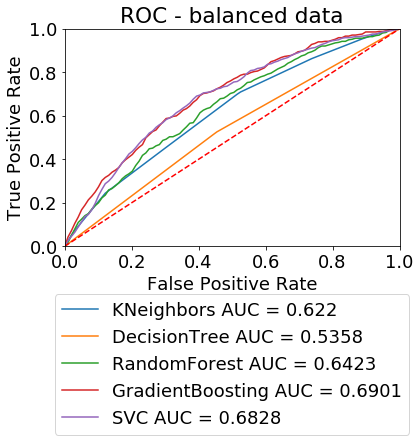

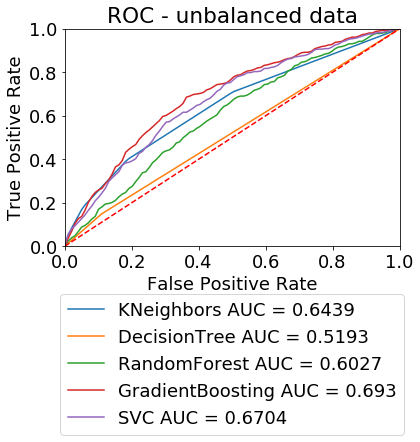

In [358]:
#cv_perf_validation = cv_perf_validation.apply(pd.to_numeric)
#roc_perf_validation = roc_perf_validation.apply(pd.to_numeric)

plot_roc_validation()

#roc_mean_perf_validation = roc_mean_perf_validation.apply(pd.to_numeric)


In [359]:
cv_perf_validation = cv_perf_validation.apply(pd.to_numeric)
#roc_perf_validation = roc_perf_validation.apply(pd.to_numeric)
#roc_mean_perf_validation = roc_mean_perf_validation.apply(pd.to_numeric)
((cv_perf_validation.groupby(['classifier_name','balanced']).mean()).join(roc_mean_perf_validation[["auc","auc_std"]])).drop(columns = ['accuracy', 'specificity'])

recall  precision  f1 score       auc  auc_std
classifier_name  balanced                                                  
KNeighbors       True      0.707434   0.071864  0.130473  0.621988      0.0
                 False     0.059952   0.006090  0.011057  0.643903      0.0
DecisionTree     True      0.525180   0.053350  0.096860  0.535792      0.0
                 False     0.148681   0.015104  0.027421  0.519284      0.0
RandomForest     True      0.678657   0.068940  0.125166  0.642276      0.0
                 False     0.000000   0.000000       NaN  0.602658      0.0
GradientBoosting True      0.654676   0.066504  0.120743  0.690127      0.0
                 False     0.007194   0.000731  0.001327  0.692961      0.0
SVC              True      0.693046   0.070402  0.127820  0.682764      0.0
                 False     0.000000   0.000000       NaN  0.670409      0.0

In [360]:
#Evaluating Feature Importance
test = pd.DataFrame(classifier_3_balanced.feature_importances_, columns=["attributes"])
test.index = data_train.columns
test.sort_values(by=["attributes"], ascending=False).head(10)

attributes
zcr                std    mean    0.048736
spectral_contrast  skew   mean    0.039484
spectral_bandwidth max    mean    0.039447
spectral_centroid  std    mean    0.033980
rmse               std    mean    0.030744
mfcc               min    mean    0.030303
spectral_contrast  min    mean    0.029023
chroma_cqt         std    mean    0.026450
                   min    mean    0.026103
spectral_contrast  median mean    0.025775

In [ ]:
###################
#Ab hier Fundgrube#
###################

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    sound_features_scaled, popularities, test_size=0.2, random_state=42, stratify=None)

In [ ]:
from sklearn.linear_model import LinearRegression

regressionmodel = LinearRegression()
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
print(regressionmodel.coef_)
predictions = regressionmodel.predict(data_test)

In [ ]:
from sklearn.svm import SVR

regressionmodel = SVR()
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
predictions = regressionmodel.predict(data_test)

In [ ]:
from sklearn.linear_model import SGDRegressor

regressionmodel = SGDRegressor(max_iter=10000)
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
predictions = regressionmodel.predict(data_test)

In [ ]:
print(target_test)
print(np.mean(predictions), np.max(predictions), np.min(predictions))

In [ ]:
predictions[predictions < 0] = 0
predictions[predictions > 100] = 100

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error
print(explained_variance_score(predictions, target_test))
print(mean_squared_error(predictions, target_test))

In [ ]:
#scatter matrix mean top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"mean_C":"mean_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (0,1))
plt.show()

#scatter matrix min top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"min_C":"min_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (-0.5,0.5))
plt.show()

#scatter matrix max top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"max_C":"max_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (0.5,1.5))
plt.show()

In [ ]:
import dill

In [ ]:
dill.dump_session("C:/Data/sessiondump2.session")

In [ ]:
dill.load_session("C:/Data/sessiondump2.session")

In [ ]:
cv_perf

In [ ]:
cv_mean_perf = cv_perf.groupby(['classifier_name','coeff_value','balanced']).mean()
cv_mean  = cv_mean_perf.join(roc_mean_perf[["auc","auc_std"]])
cv_mean.drop(columns = ['precision', 'recall'])

In [ ]:
cv_perf_validation.dtypes

In [ ]:
test = cv_perf_validation
test = test.apply(pd.to_numeric)
test

In [ ]:
cv_perf_validation
roc_perf_validation
roc_mean_perf_validation

In [ ]:
target_train.value_counts()

In [ ]:
popularities.describe()